# HR Analytics Project- Understanding the Attrition in HR


Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees. How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Exploratory Data Analysis 

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [10]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [12]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [13]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Visualization

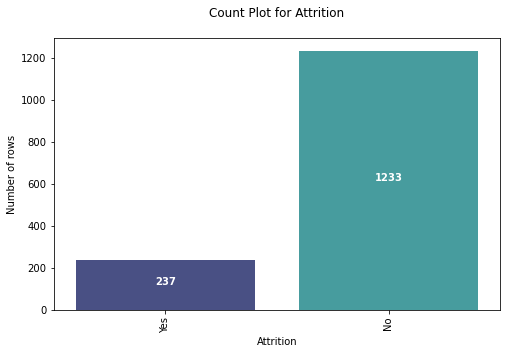

In [15]:
plt.figure(figsize=(8,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

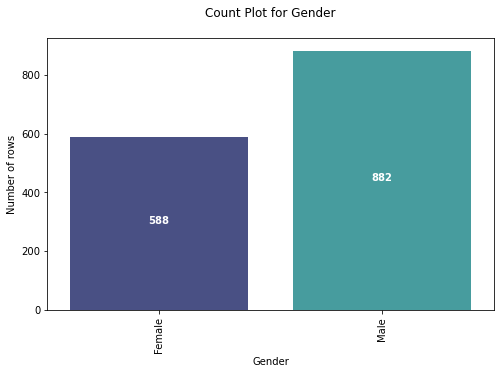

In [16]:
plt.figure(figsize=(8,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

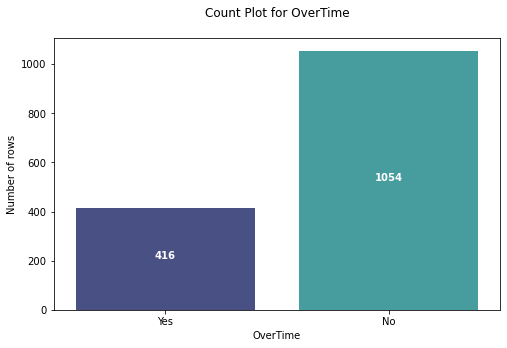

In [17]:
plt.figure(figsize=(8,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()


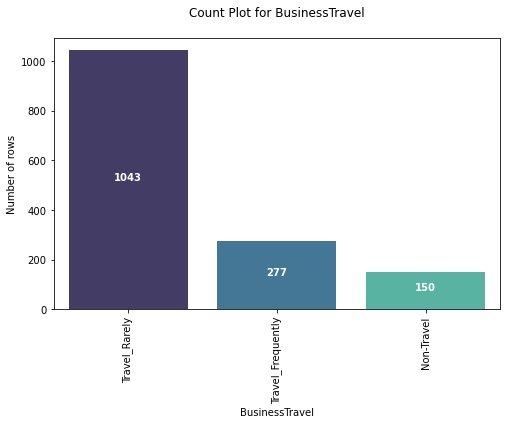

In [18]:
plt.figure(figsize=(8,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

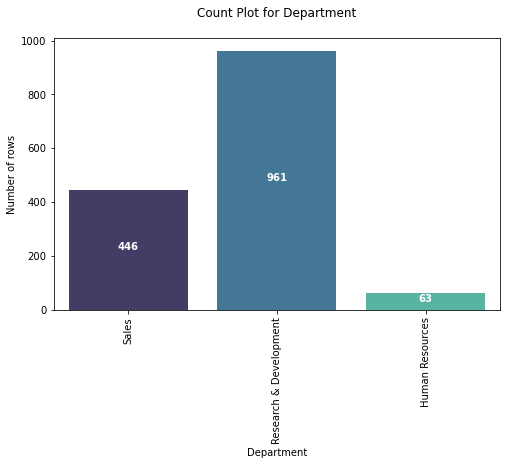

In [19]:
plt.figure(figsize=(8,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

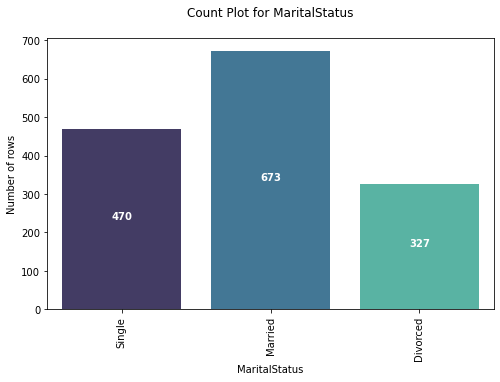

In [20]:
plt.figure(figsize=(8,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()


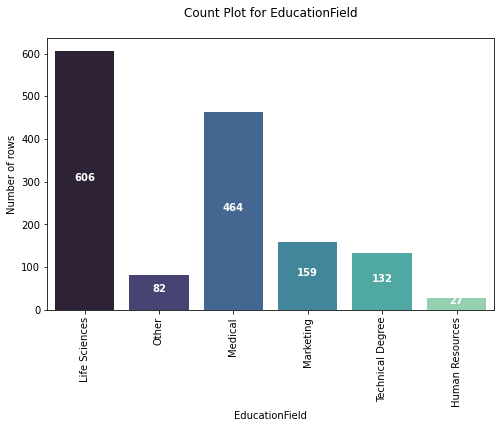

In [22]:
plt.figure(figsize=(8,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

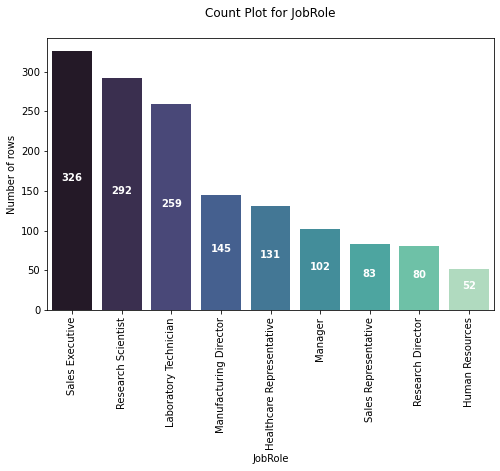

In [23]:
plt.figure(figsize=(8,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

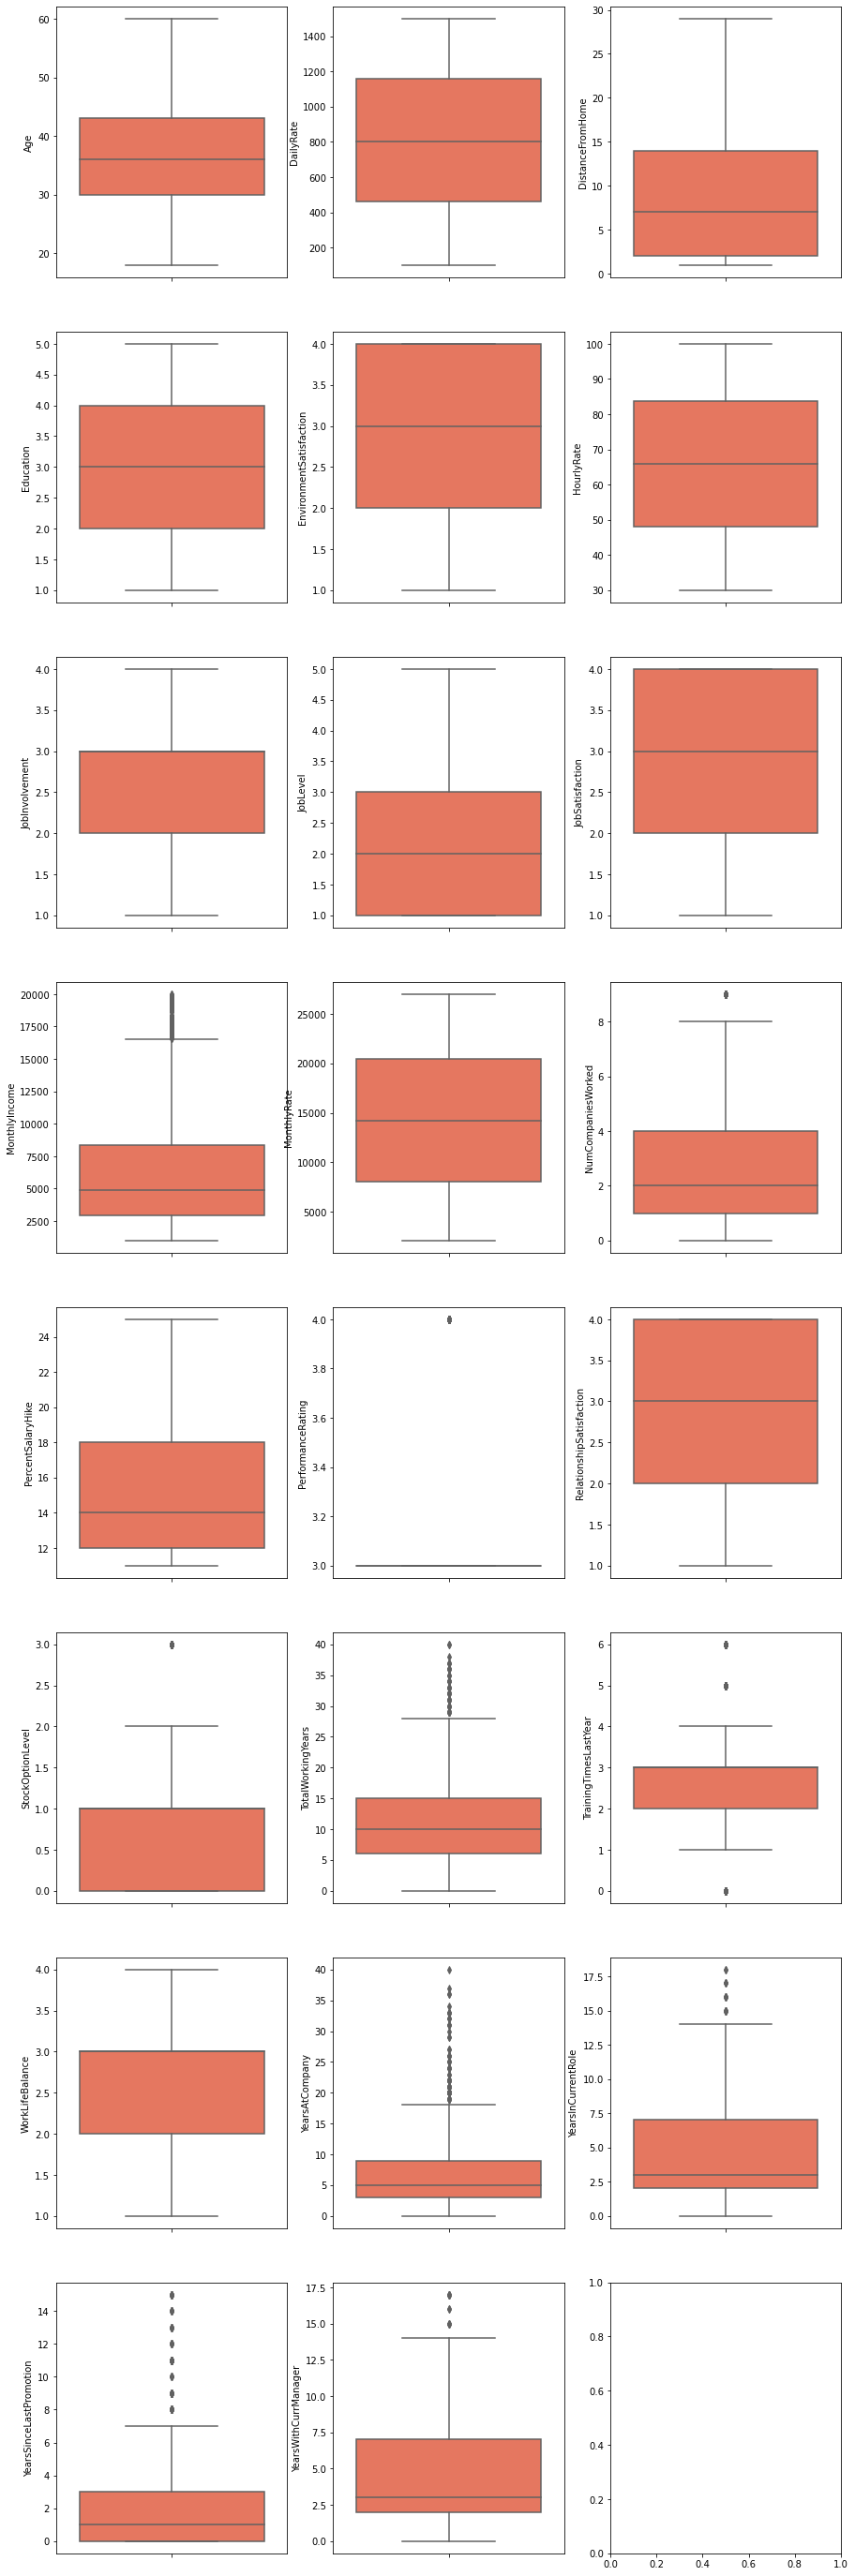

In [24]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Reds")
    index += 1
plt.show()

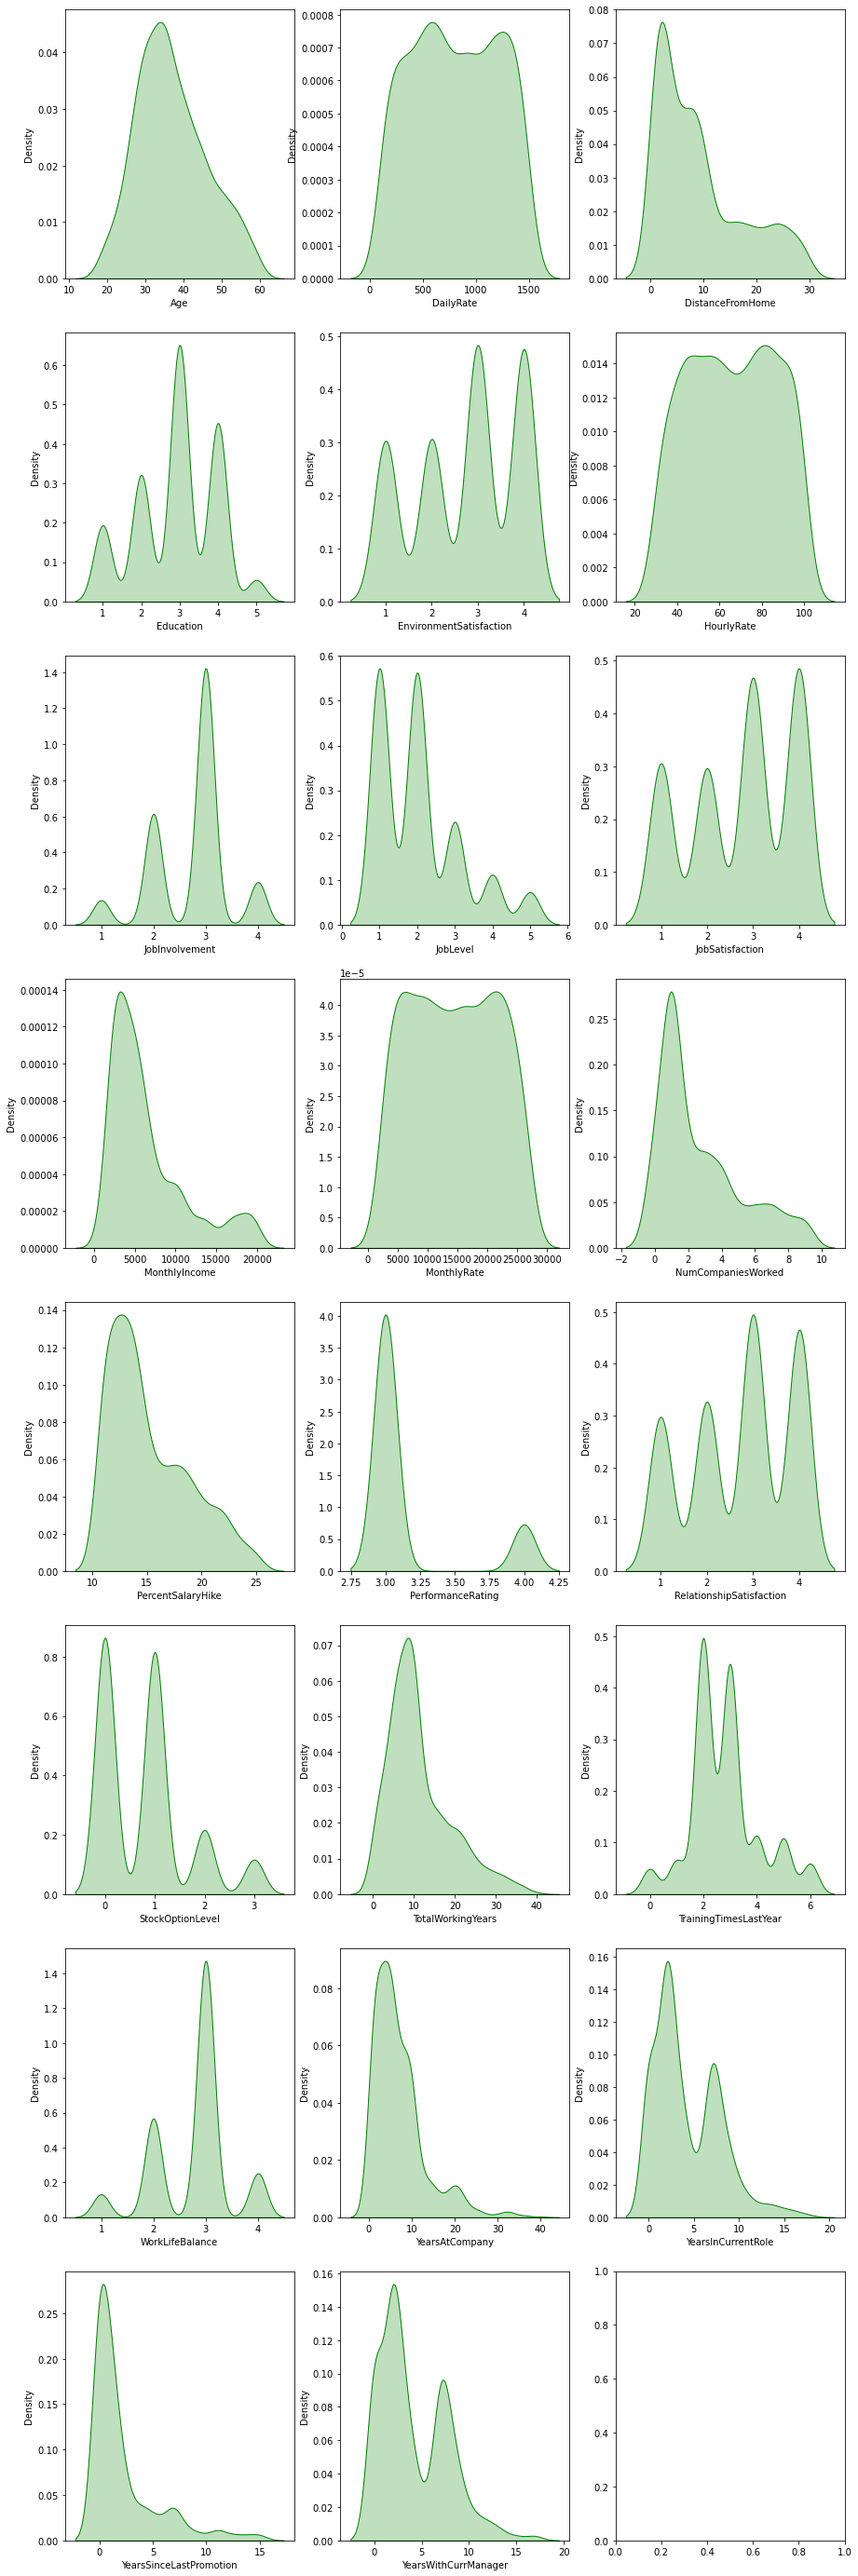

In [25]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.show()

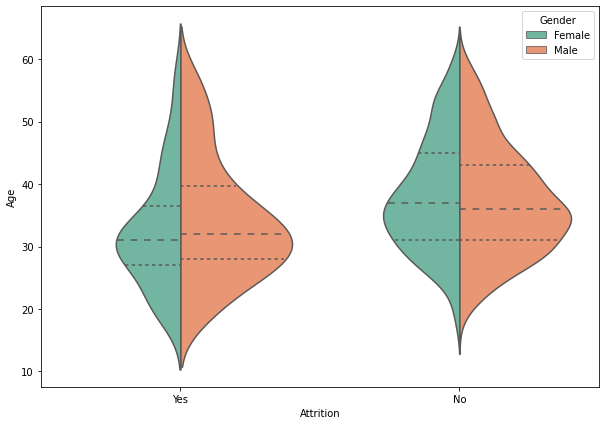

In [26]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

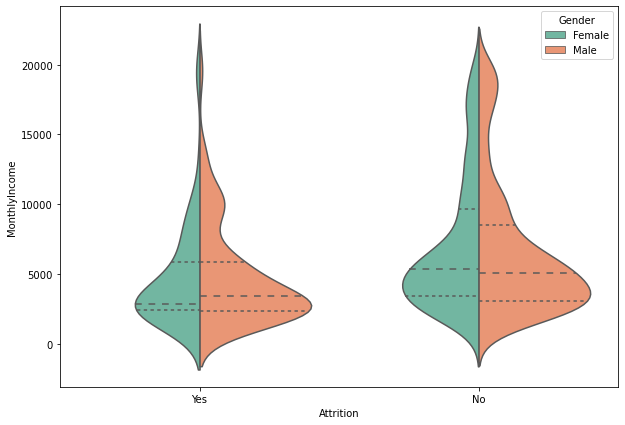

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

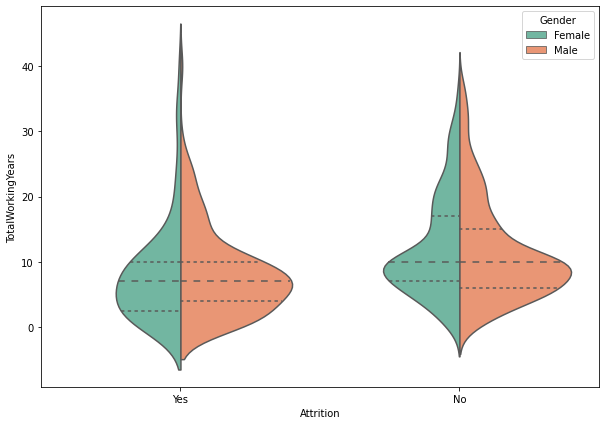

In [28]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

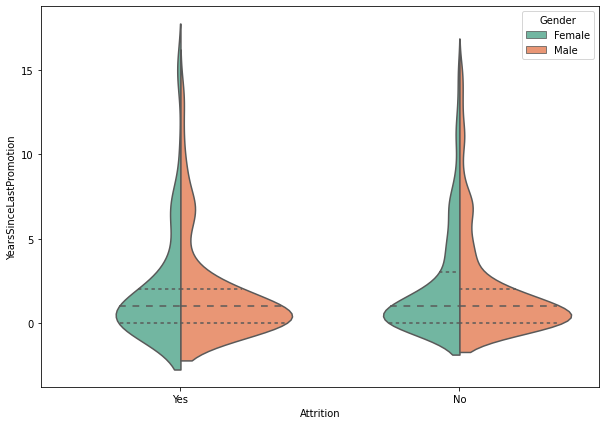

In [29]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

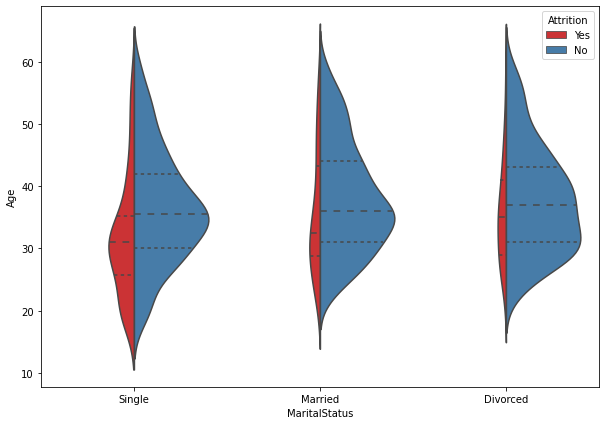

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

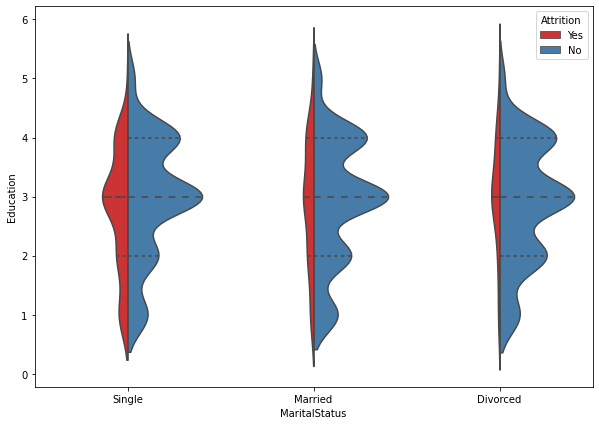

In [31]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

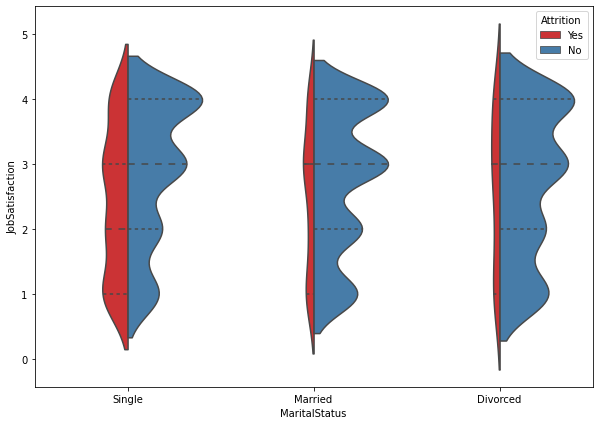

In [32]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

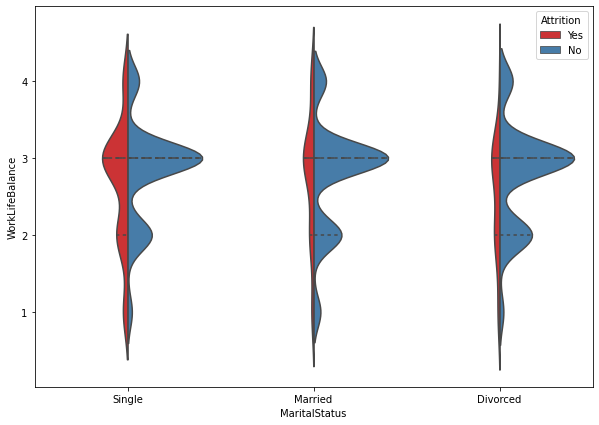

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

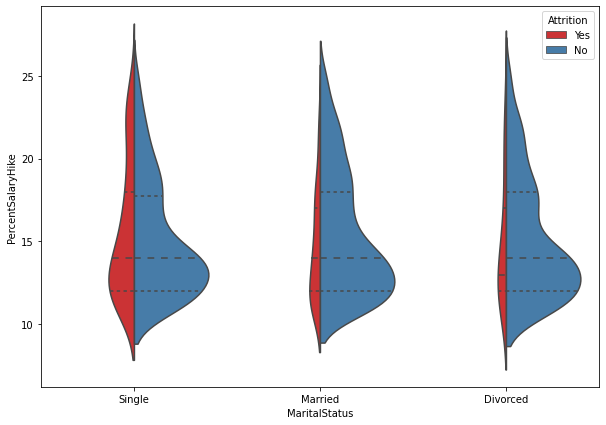

In [34]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               palette="Set1", split=True, scale="count", inner="quartile")
plt.show()

Encoding the categorical object datatype columns

In [35]:
# Label Encoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

In [36]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [37]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))


In [38]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


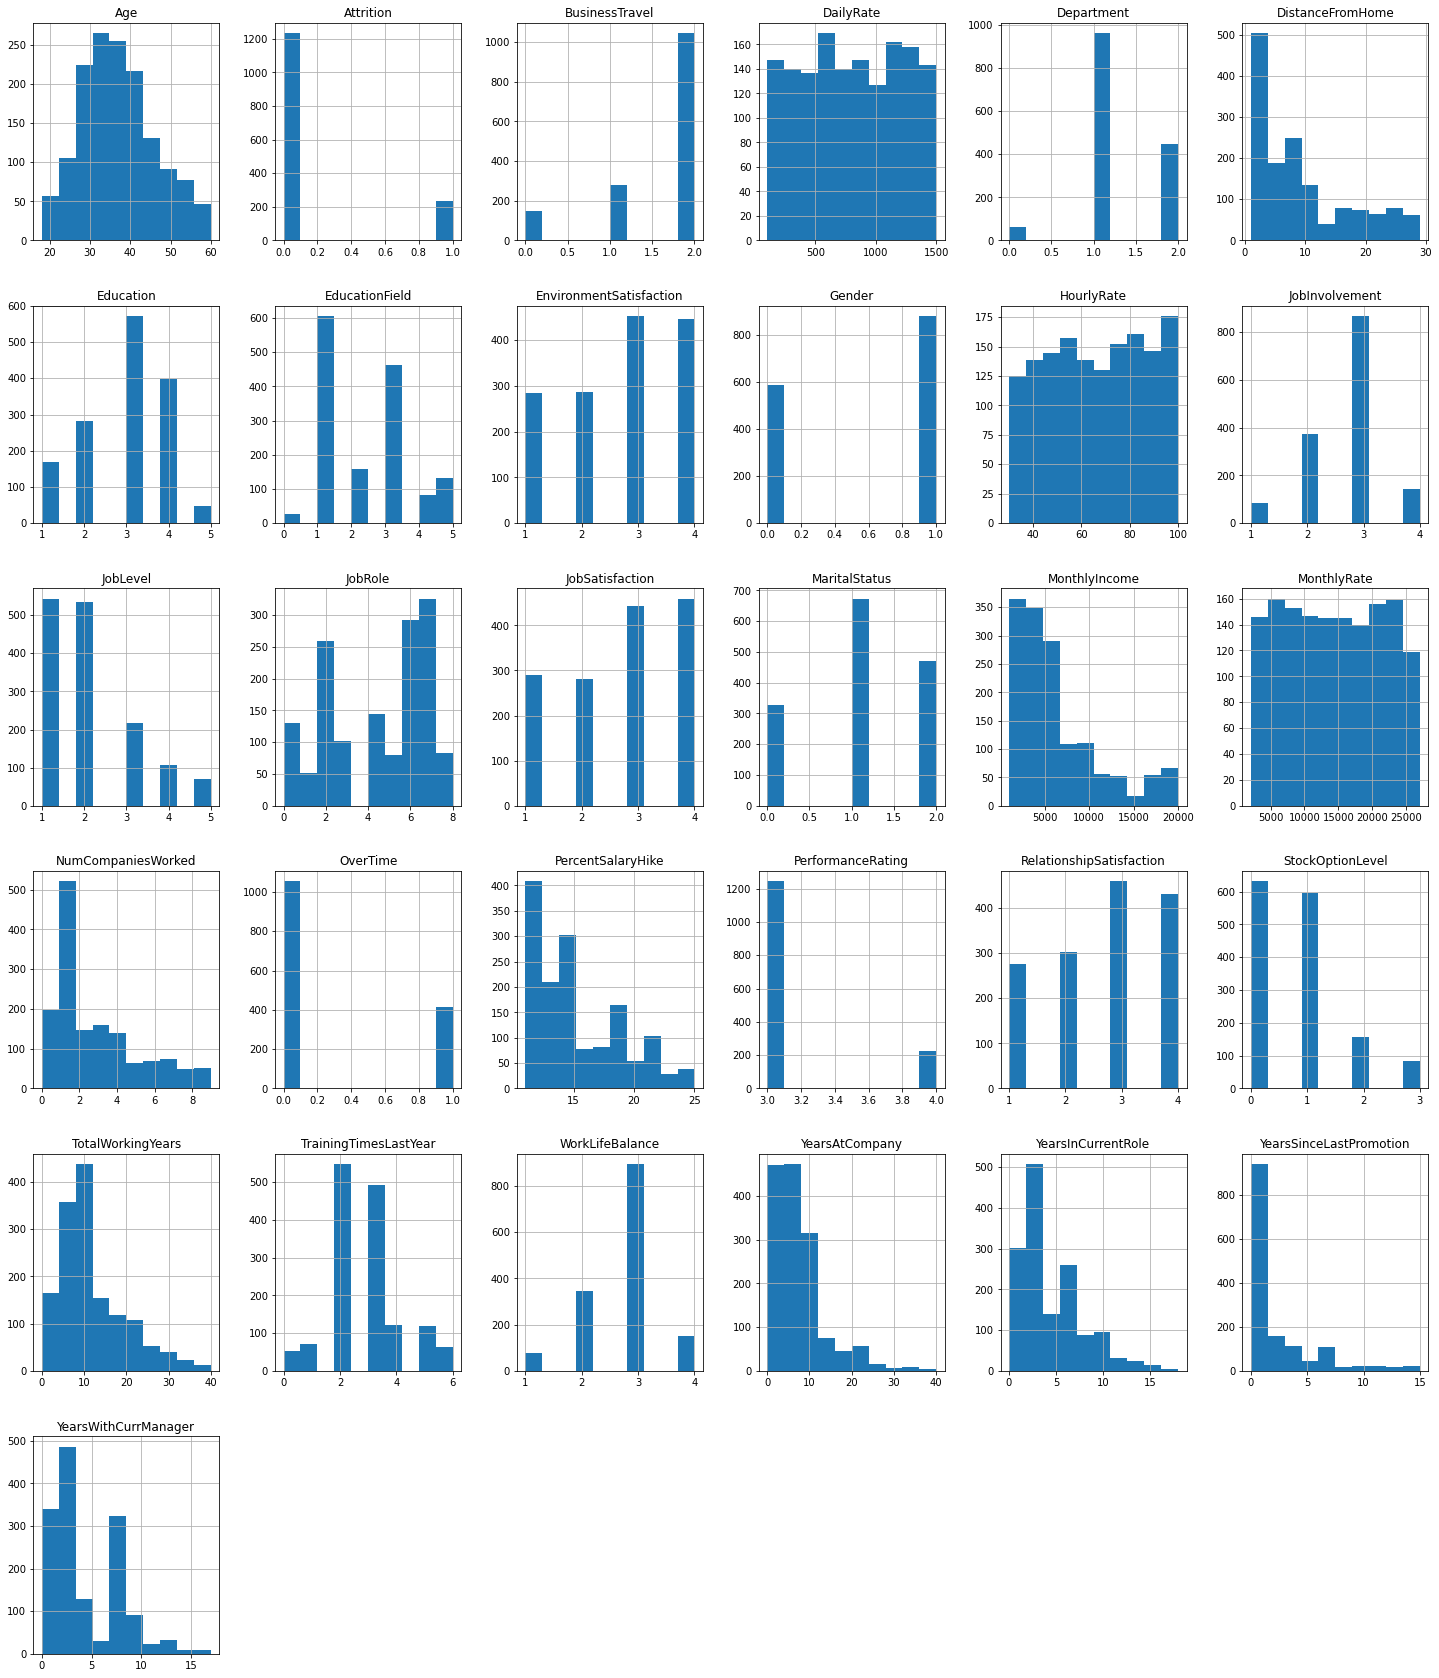

In [39]:
df.hist(figsize=(25,30))
plt.show()

Correlation using a Heatmap

Positive correlation

Negative correlation

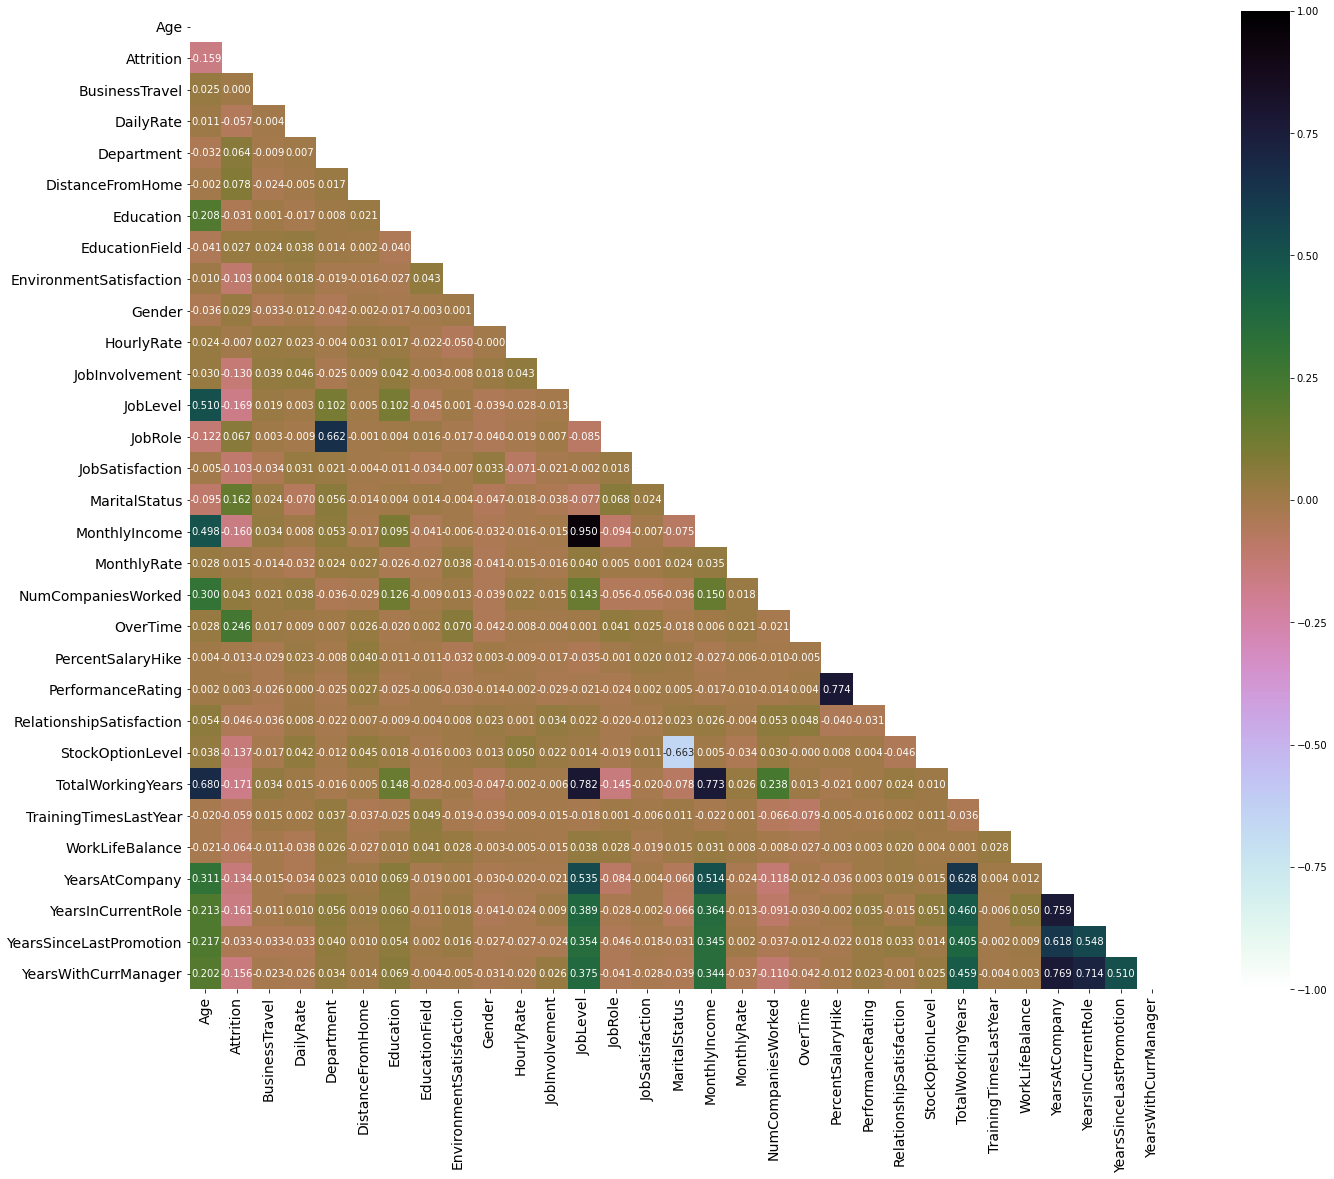

In [40]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

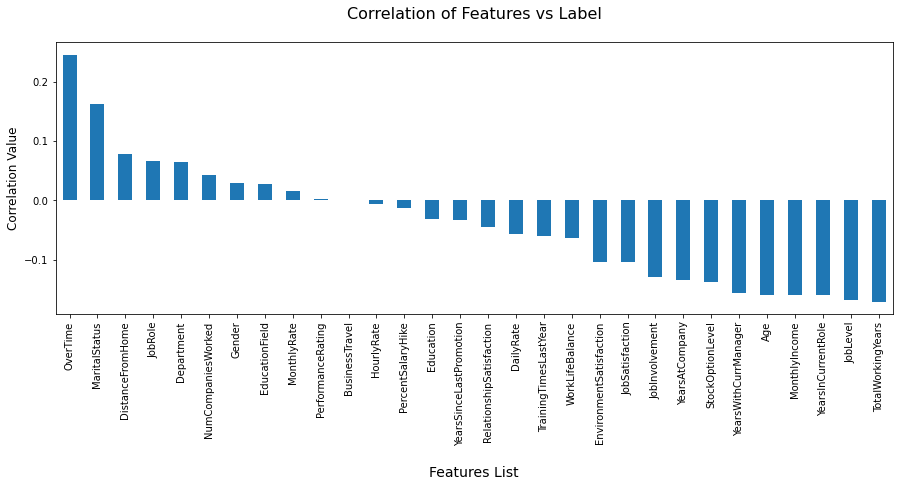

In [41]:
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Using Z Score to remove outliers

In [43]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1387, 31)
Shape of the dataframe after removing outliers:  (1304, 31)
Percentage of data loss post outlier removal:  5.984138428262437


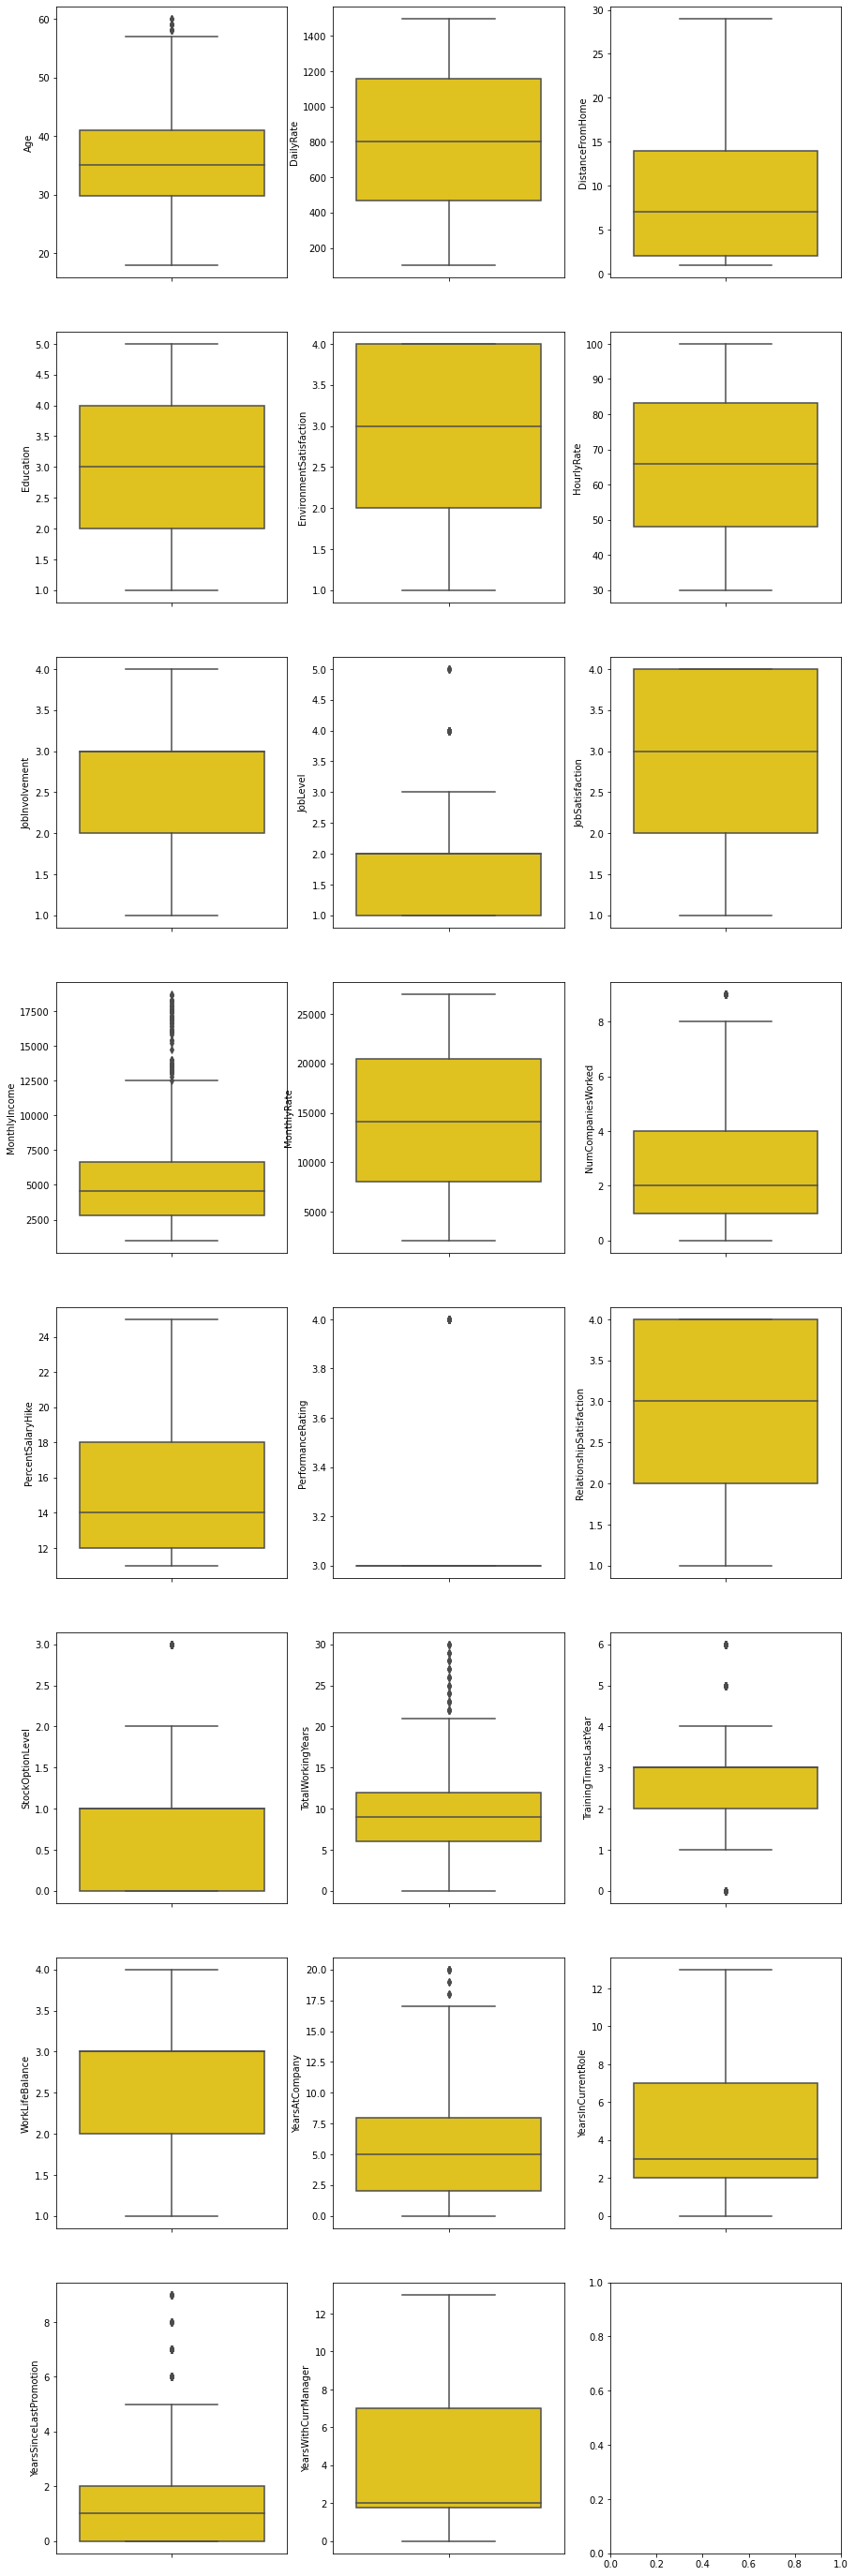

In [44]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="prism")
    index += 1
plt.show()

In [45]:
df.skew()

Age                         0.526943
Attrition                   1.749533
BusinessTravel             -1.414592
DailyRate                  -0.014199
Department                  0.177341
DistanceFromHome            0.935391
Education                  -0.279545
EducationField              0.551717
EnvironmentSatisfaction    -0.319471
Gender                     -0.427052
HourlyRate                 -0.032833
JobInvolvement             -0.496090
JobLevel                    0.940555
JobRole                    -0.415162
JobSatisfaction            -0.335845
MaritalStatus              -0.173388
MonthlyIncome               1.531140
MonthlyRate                 0.039330
NumCompaniesWorked          1.046568
OverTime                    0.960516
PercentSalaryHike           0.796258
PerformanceRating           1.942566
RelationshipSatisfaction   -0.275672
StockOptionLevel            0.957507
TotalWorkingYears           0.980416
TrainingTimesLastYear       0.584609
WorkLifeBalance            -0.545492
Y

Using Log Transform to fix skewness

In [46]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

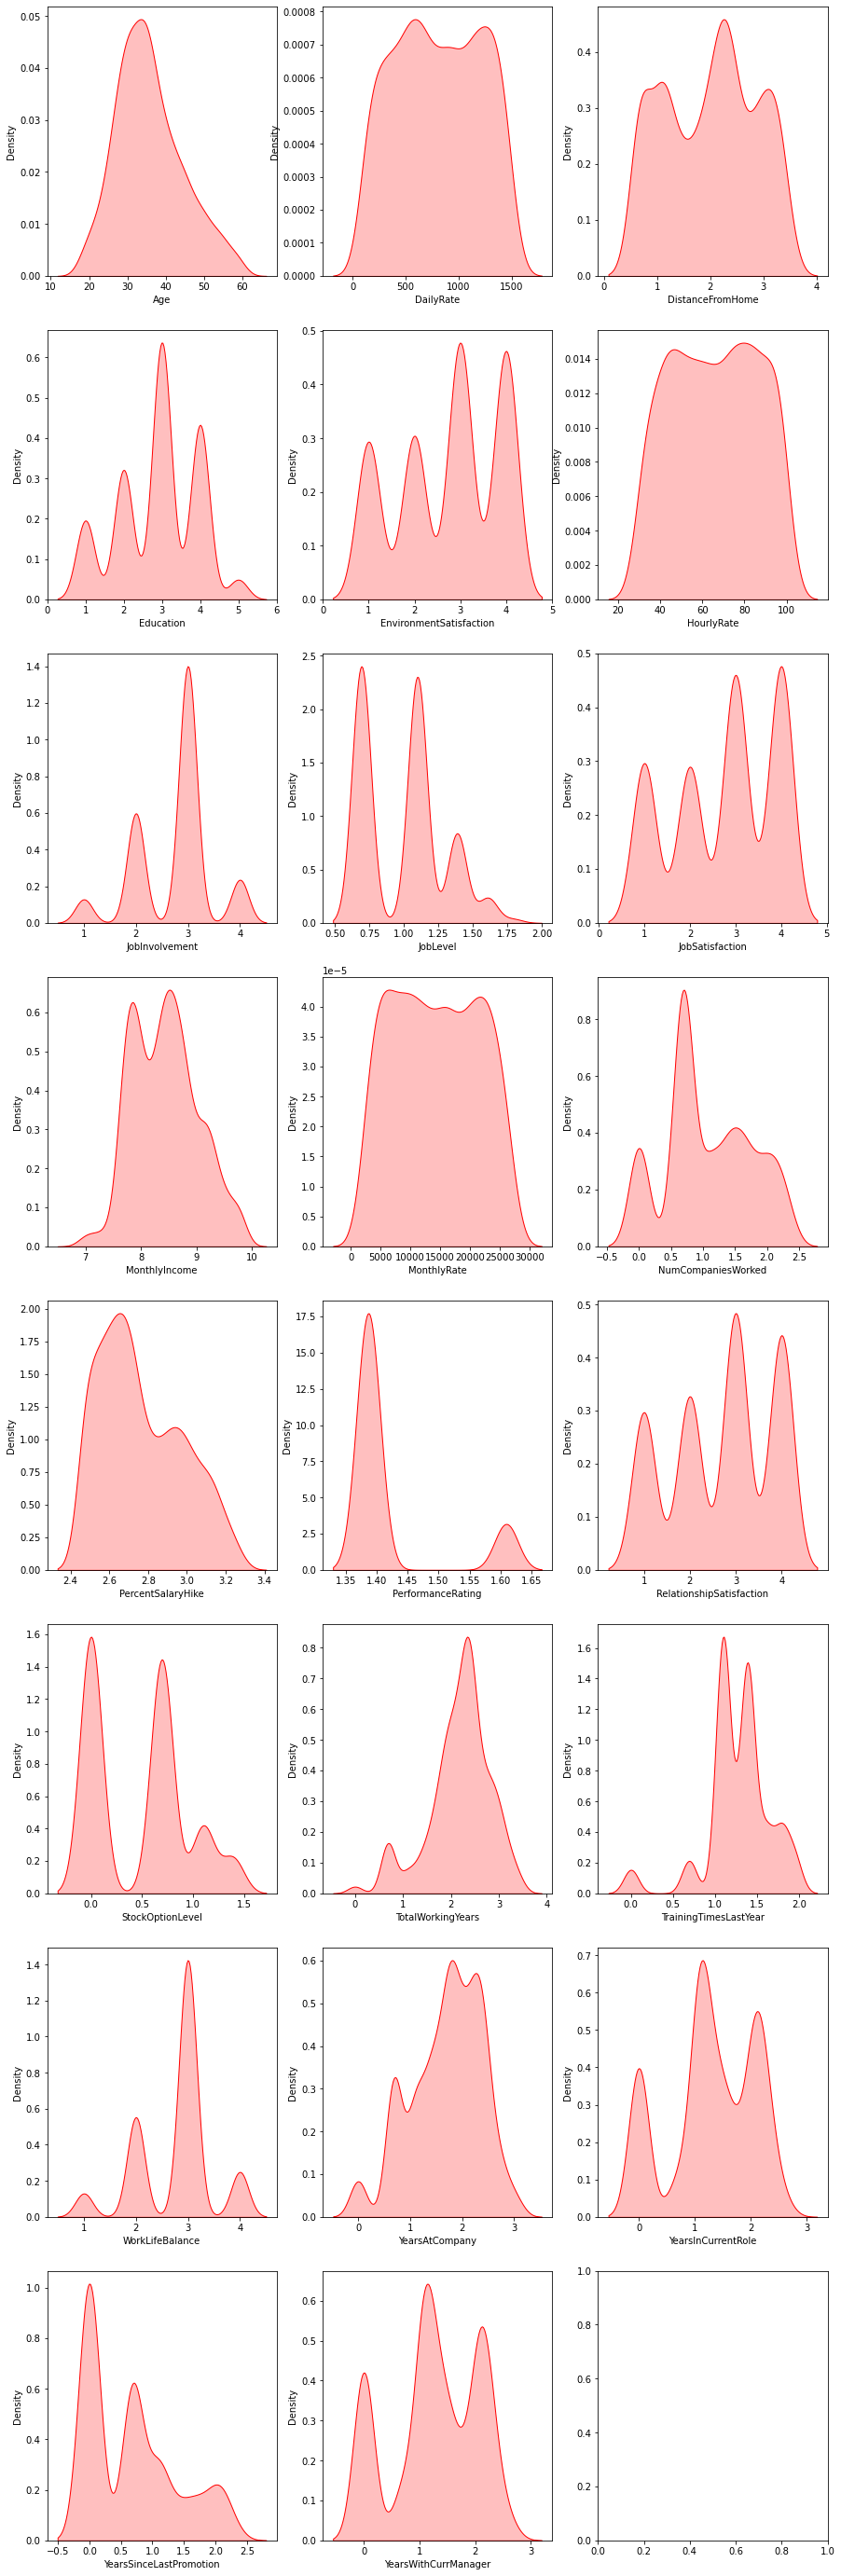

In [47]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [48]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

Resolving the class imbalance issue in label column

In [49]:
Y.value_counts()

0    1081
1     223
Name: Attrition, dtype: int64

In [50]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [52]:
Y.value_counts()

1    1081
0    1081
Name: Attrition, dtype: int64

Feature Scaling

In [53]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.807882,0.675289,0.824346,1.400145,-1.704110,-0.759764,-1.029811,-0.440544,-1.362715,1.530816,0.621779,0.562929,0.985408,1.408124,1.144555,0.669790,0.706382,1.773749,1.350082,-1.371832,-0.459553,-1.421230,-0.959344,0.240538,-3.498587,-2.120279,0.584340,0.607975,-0.964731,0.885119
1,1.770550,-0.994296,-1.301780,-0.595296,0.164696,-1.796110,-1.029811,0.498762,0.847734,-0.239323,-0.745755,0.562929,0.558035,-0.456153,-0.303616,0.385543,1.480469,-0.644550,-0.870035,2.090656,2.534629,1.441533,0.641377,0.550281,0.346118,0.558098,1.264664,1.248635,0.092714,1.263766
2,0.326548,0.675289,1.524443,-0.595296,-1.200323,-0.759764,1.331900,1.438068,0.847734,1.423535,-0.745755,-0.963392,-1.151458,0.475986,1.144555,-1.255769,-1.729827,1.369678,1.350082,0.065231,-0.459553,-0.466976,-0.959344,0.058735,0.346118,0.558098,-2.344625,-1.585841,-0.964731,-1.473196
3,-0.154786,-0.994296,1.573528,-0.595296,-0.842879,1.312929,-1.029811,1.438068,-1.362715,-0.507526,0.621779,-0.963392,0.558035,0.475986,-0.303616,-0.651451,1.231187,-0.644550,1.350082,-1.371832,-0.459553,0.487279,-0.959344,0.240538,0.346118,0.558098,0.962616,1.248635,1.150159,-1.473196
4,-0.876787,0.675289,-0.495764,-0.595296,-1.200323,-1.796110,0.544663,-1.379851,0.847734,-1.365776,0.621779,-0.963392,-1.151458,-0.456153,-0.303616,-0.330170,0.300371,1.943151,-0.870035,-0.971993,-0.459553,1.441533,0.641377,-0.147377,0.346118,0.558098,-0.691004,-0.088328,0.711280,-0.027202


Finding best random state for building Regression Models

In [54]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 89.09426987060998 on Random State 869


Creating the training and testing data sets

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)

Machine Learning Model for Classification with Evaluation Metrics

In [56]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [57]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 83.54898336414048

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       275
           1       0.85      0.81      0.83       266

    accuracy                           0.84       541
   macro avg       0.84      0.84      0.84       541
weighted avg       0.84      0.84      0.84       541

Cross Validation Score: 84.32223505260457

Accuracy Score - Cross Validation Score is -0.7732516884640859


In [58]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 90.75785582255084

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       275
           1       0.93      0.88      0.90       266

    accuracy                           0.91       541
   macro avg       0.91      0.91      0.91       541
weighted avg       0.91      0.91      0.91       541

Cross Validation Score: 90.338187494654

Accuracy Score - Cross Validation Score is 0.4196683278968436


In [59]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 84.10351201478743

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       275
           1       0.84      0.84      0.84       266

    accuracy                           0.84       541
   macro avg       0.84      0.84      0.84       541
weighted avg       0.84      0.84      0.84       541

Cross Validation Score: 83.21614917457873

Accuracy Score - Cross Validation Score is 0.887362840208695


In [60]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 90.75785582255084

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       275
           1       0.97      0.84      0.90       266

    accuracy                           0.91       541
   macro avg       0.92      0.91      0.91       541
weighted avg       0.91      0.91      0.91       541

Cross Validation Score: 90.5277563938072

Accuracy Score - Cross Validation Score is 0.23009942874364242


In [61]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 74.86136783733826

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.56      0.69       275
           1       0.67      0.95      0.79       266

    accuracy                           0.75       541
   macro avg       0.79      0.75      0.74       541
weighted avg       0.80      0.75      0.74       541

Cross Validation Score: 78.67782909930716

Accuracy Score - Cross Validation Score is -3.8164612619688967


In [62]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.82439926062847

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       275
           1       0.99      0.91      0.95       266

    accuracy                           0.95       541
   macro avg       0.95      0.95      0.95       541
weighted avg       0.95      0.95      0.95       541

Cross Validation Score: 94.26898896587119

Accuracy Score - Cross Validation Score is 0.5554102947572801


In [63]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 90.57301293900186

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       275
           1       0.95      0.85      0.90       266

    accuracy                           0.91       541
   macro avg       0.91      0.90      0.91       541
weighted avg       0.91      0.91      0.91       541

Cross Validation Score: 88.12451886066205

Accuracy Score - Cross Validation Score is 2.448494078339806


In [64]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 91.1275415896488

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       275
           1       0.97      0.85      0.90       266

    accuracy                           0.91       541
   macro avg       0.92      0.91      0.91       541
weighted avg       0.92      0.91      0.91       541

Cross Validation Score: 88.54097168762296

Accuracy Score - Cross Validation Score is 2.5865699020258432


Hyper parameter tuning on the best Classification ML Model

In [65]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

In [66]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

In [67]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [68]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [69]:
GSCV.best_score_

0.8550389363722697

In [70]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 83.91866913123845


AUC ROC Curve

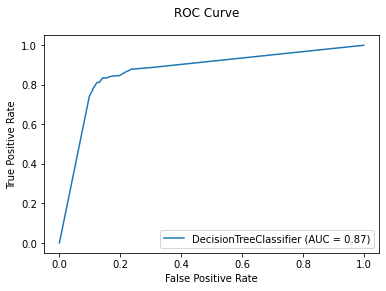

In [71]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Confusion Matrix

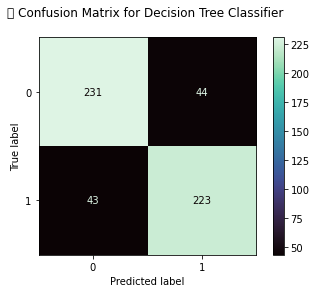

In [73]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

Saving the model

In [74]:
filename = "FinalModel_HR01.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_HR01.pkl']